# **Experiment C1**: full algorithm of concent from smudged ground truth

Vary noise level and number of images

In [1]:
# Mount Google Drive
from google.colab import drive # import drive from google colab
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd /content/drive/MyDrive/PhD/Projects/2 - Cryo-EM/src/Cryo-EM

[Errno 2] No such file or directory: '/content/drive/MyDrive/PhD/Projects/2 - Cryo-EM/src/Cryo-EM'
/Users/wdiepeveen/Documents/PhD/Projects/2 - Cryo-EM/src/src/Cryo-EM/projects/lifting_v2/experiments/experimentA1


In [ ]:
# install libraries in Colab env
!pip install mrcfile
!pip install aspire
!pip install quaternionic
!pip install pykeops[colab] > install.log

     |████████████████████████████████| 186 kB 11.5 MB/s 
     |████████████████████████████████| 2.2 MB 47.6 MB/s 
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/base_command.py", line 180, in _main
    status = self.run(options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/cli/req_command.py", line 199, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/commands/install.py", line 319, in run
    reqs, check_supported_wheels=not options.target_dir
  File "/usr/local/lib/python3.7/dist-packages/pip/_internal/resolution/resolvelib/resolver.py", line 128, in resolve
    requirements, max_rounds=try_to_avoid_resolution_too_deep
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/resolvelib/resolvers.py", line 473, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "/usr/local/lib/python3.7/dist-packages/pip/_vendor/r

In [1]:
import numpy as np
import os
import logging

from projects.lifting_v2.experiments.experimentC2.E1_run import run_experiment
from projects.lifting_v2.experiments.experimentC2.E2_post_processing import post_processing

from tools.exp_tools import Exp

logger = logging.getLogger(__name__)

[pyKeOps]: Warning, no cuda detected. Switching to cpu only.


In [6]:
# Experiment parameters
vol_smudge = 5
img_size = 129  # was 65 before and was 129 in rotation estimation paper
mr_repeat = 0 # number of times mesh refinement
snr = 1 / 16  # [1/2, 1/4, 1/8, 1/16, 1/32, 1/64, 1/128, 1/256]
num_imgs = 1024  # 5000  # [512, 1024, 2048, 4096, 8192]
lambda0 = 1
# rots_batch_size = 10000

max_iter = 3

# Directly start experiment
exp = Exp()

exp.begin(prefix="expC2" , postfix="SNR{}_L{}_N{}_r{}_lam{}_i{}".format(int(1/snr),img_size,num_imgs,mr_repeat, int(lambda0), max_iter))
exp.dbglevel(4)

2022-01-25 12:46:33,423 INFO Results folder is /Users/wdiepeveen/Documents/PhD/Projects/2 - Cryo-EM/src/src/Cryo-EM/tools/../results/expC2_22-01-25_12-46-33_SNR16_L129_N1024_r0_lam1_i3


In [7]:
# Set data path
data_dir = "data"
data_filename = "clean70SRibosome_vol_65p.mrc"
data_path = os.path.join("..", "..", "..", "..",data_dir, data_filename)

# Set results folder if skip_preprocessing
# results_folder = "results/expA2_21-10-10_12-30-19_L65_N512_r1_k90_lamV10_lamD-8"
# results_folder = "results/expA2_21-10-10_12-34-53_L65_N512_r2_k90_lamV10_lamD-8"
# results_folder = "results/expA2_21-10-10_13-08-24_L65_N512_r1_k90_lamV10_lamD-10"
# results_folder = "results/expA2_21-10-10_13-47-27_L65_N512_r2_k90_lamV10_lamD-10"  # "results/lifting_21-04-26_12-22-06"

In [8]:
# Experiment

logger.info("Start Experiment")
logger.info("Running Experiment for SNR = {} and {} images".format(snr, num_imgs))

run_experiment(exp=exp,
               max_iter=max_iter,
               num_imgs=num_imgs,
               snr=snr,
               img_size=img_size,
               mr_repeat=mr_repeat,
               rots_reg_param=lambda0,
               data_path=data_path,
               vol_smudge=vol_smudge,
               )

2022-01-25 12:46:33,945 INFO Start Experiment
2022-01-25 12:46:33,947 INFO Running Experiment for SNR = 0.0625 and 1024 images
2022-01-25 12:46:33,949 INFO This experiment illustrates orientation refinement using a lifting approach
2022-01-25 12:46:33,950 INFO Initialize simulation object and CTF filters.
2022-01-25 12:46:33,952 INFO Load 3D map and downsample 3D map to desired grids of 129 x 129 x 129.
2022-01-25 12:46:34,814 INFO Use downsampled map to creat simulation object.
2022-01-25 12:46:34,833 INFO Get true rotation angles generated randomly by the simulation object.
2022-01-25 12:46:47,556 INFO Applying forward transformations in pipeline
2022-01-25 12:46:47,557 INFO All forward transformations applied
2022-01-25 12:46:47,558 INFO Loaded 1024 images
sigma^2 = 3.598538460678088e-10
2022-01-25 12:46:59,481 INFO Applying forward transformations in pipeline
2022-01-25 12:46:59,482 INFO All forward transformations applied
2022-01-25 12:46:59,483 INFO Loaded 1024 images
2022-01-25 

kernel = [[[ 7.48454549e-05 -4.22422499e-06  8.32209480e-06 ... -5.11861290e-05
   -7.28551895e-05 -2.22859580e-05]
  [ 9.94582078e-05 -6.35105380e-07 -4.96134044e-06 ... -6.61477243e-05
   -3.98244629e-05 -8.21704671e-05]
  [ 4.83709700e-05 -1.86760353e-05  8.42304689e-06 ...  3.46379456e-05
    4.76581263e-05  1.04661904e-05]
  ...
  [-5.41141026e-06 -3.13172532e-05 -3.48680915e-05 ... -3.50795162e-05
   -1.51855738e-05  4.25252938e-06]
  [ 5.89459305e-05  3.68319124e-05  1.02105259e-05 ... -3.94992931e-05
    3.22673395e-06  7.10356762e-05]
  [ 3.96937758e-05  9.38897647e-05  4.02069381e-05 ...  2.45347728e-05
    1.71676254e-06 -1.60179316e-05]]

 [[ 3.54797412e-05  1.34950014e-05 -8.00282749e-07 ...  7.89916885e-06
   -6.33829950e-06  8.20780133e-06]
  [ 6.87164793e-05  2.85617807e-06 -1.19618398e-05 ... -3.20266954e-05
    1.44856922e-05 -8.94975092e-05]
  [ 7.50324625e-06 -4.87554062e-05 -2.12854520e-05 ...  1.53866094e-05
    3.14235076e-05 -7.15471760e-05]
  ...
  [ 1.58310777

F3 = [8.083209e-06]
2022-01-25 12:47:50,249 INFO Running through projections 0/1821 = 0.0%
F1 = [4.4223172e-09 5.7835106e-09 4.6417989e-09 ... 4.7522342e-09 5.1121725e-09
 4.2102570e-09]
F2 = [ 1.7382308e-10 -2.0620941e-08  8.4828375e-09 ...  3.1690632e-09
 -8.2232177e-09  1.8982209e-09]
F = [4.8601678e-10 4.8484894e-10 4.8652926e-10 ... 4.8621662e-10 4.8555360e-10
 4.8610760e-10]
2022-01-25 12:48:09,944 INFO Do rots update step
len(V) = 1024
U = [-71.31155 -71.69044 -71.71481 ... -72.35392 -72.35858 -72.38004]
cssv = [-7.23343124e+01 -1.43760590e+02 -2.15457825e+02 ... -1.31421234e+05
 -1.31493688e+05 -1.31566156e+05]
2022-01-25 12:48:10,114 INFO Do sigma update step
sigmas = [4.8079629e-10 3.2627778e-10 3.4588726e-10 ... 3.7209005e-10 3.3689293e-10
 3.7804318e-10]
2022-01-25 12:48:10,117 INFO Do vol update step
2022-01-25 12:48:10,118 INFO Compute adjoint forward mapping on the images
2022-01-25 12:48:10,121 INFO Running through projections 0/1821 = 0.0%
2022-01-25 12:48:27,437 INFO 

volume = [[[[ 2.73981925e-07  1.37835656e-07  3.16224998e-07 ... -2.26691945e-08
     4.48280161e-07 -9.50407895e-08]
   [ 1.88709805e-07  3.85053738e-07  1.30447773e-07 ... -3.40497081e-07
    -1.47069727e-07  2.61043851e-07]
   [ 2.20390945e-07  4.64645183e-07  1.56836009e-07 ...  1.38046801e-07
     2.20502230e-08  5.19889127e-08]
   ...
   [ 1.68973415e-07  3.42784176e-07  1.86511684e-07 ...  3.57883039e-07
    -2.21923074e-07 -3.55464863e-07]
   [-3.21333545e-07  1.48849040e-07 -8.02263855e-09 ...  2.11908969e-07
    -3.49219476e-07 -4.12274346e-07]
   [ 7.89286716e-08 -8.81106743e-08 -1.09847164e-07 ...  2.31276573e-07
    -1.92492536e-07  1.56740342e-07]]

  [[ 3.86417270e-07 -1.20720813e-07  3.16449054e-08 ...  2.68714508e-08
     4.59842724e-08 -3.21885722e-07]
   [ 4.59991782e-07 -5.08156859e-08  2.16851348e-07 ...  4.19897731e-07
     1.14473266e-07  1.71083258e-07]
   [-2.71210268e-07 -5.02385376e-07  2.79651630e-07 ...  3.46139018e-07
     3.25266399e-07  9.06124455e-08]
 

kernel = [[[ 2.50810195e-09  1.16624238e-10  7.58500196e-09 ...  5.59991720e-10
    6.10110407e-09  1.04926245e-08]
  [-7.82148479e-09  1.54895374e-09  1.98946770e-09 ...  7.20163307e-09
    4.43443149e-09  4.33587433e-09]
  [-5.93417493e-09 -3.93850774e-09 -6.95068114e-10 ...  7.47331086e-09
    1.46087176e-09  4.18252499e-09]
  ...
  [-2.04913464e-09 -7.57441754e-09 -7.64378782e-09 ...  1.27310351e-09
    1.92069360e-10  2.46359794e-10]
  [ 1.63211933e-09  3.89792376e-09 -7.84132037e-10 ... -1.35164935e-09
    2.02211003e-09  6.15405860e-09]
  [ 1.05770566e-08  1.17384635e-08  7.32973993e-09 ...  1.22583854e-08
    4.85160134e-09  5.80389470e-09]]

 [[-4.98184738e-09 -1.21015002e-08 -3.75614517e-09 ... -4.34634417e-09
   -2.31103670e-09  9.48376266e-10]
  [-1.17347208e-08 -8.25242008e-09 -2.46081489e-09 ... -3.75553011e-09
    1.18715482e-09  1.75478398e-09]
  [ 6.60305255e-10 -2.77916440e-10 -3.60237395e-09 ... -2.90995317e-09
   -2.97957681e-09 -2.27753774e-10]
  ...
  [-4.48811655

2022-01-25 12:49:38,203 INFO Computing means at 100%
2022-01-25 12:49:38,205 INFO Compute adjoint forward mapping on the images
2022-01-25 12:49:38,219 INFO Running through projections 0/1024 = 0.0%
2022-01-25 12:49:43,239 INFO Determined adjoint mappings. Shape = (129, 129, 129)
2022-01-25 12:49:43,260 INFO Running through projections 0/1024 = 0.0%
2022-01-25 12:49:50,412 INFO Computing non-centered Fourier Transform
Solver has finished


2022-01-25 12:49:53,107 INFO Start Postprocessing
2022-01-25 12:49:53,108 INFO Postprocessing started
integrated (averaged) density = 1.0


/Users/wdiepeveen/PycharmProjects/Cryo-EM/lib/python3.6/site-packages/scipy/spatial/transform/rotation.py:135: UserWarning: Gimbal lock detected. Setting third angle to zero since it is not possible to uniquely determine all angles.
  warnings.warn("Gimbal lock detected. Setting third angle to zero since"


integrated (averaged) density = 0.9999923706054688
integrated (averaged) density = 1.256695032119751
2022-01-25 12:49:54,009 INFO MSE deviation of the estimated initial rotations using register_rotations : 0.07532674894304824
2022-01-25 12:49:54,041 INFO MSE deviation of the estimated GD-refined rotations using register_rotations : 1.1158957525094297


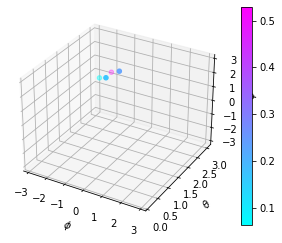

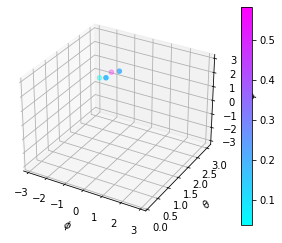

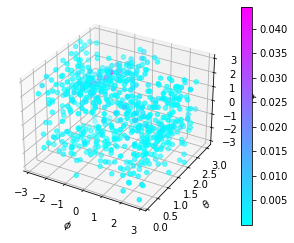

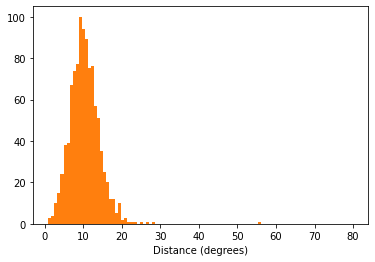

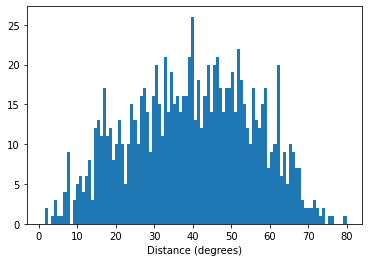

In [9]:
logger.info("Start Postprocessing")
# Postprocessing
post_processing(exp=exp,
               # num_imgs=num_imgs,
               # snr=snr,
              #  results_folder=results_folder #?
               )
